<a href="https://colab.research.google.com/github/pawel0508/CenyEnergiiElektrycznej/blob/main/TGebase_korelacje_z_danymi_makro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [101]:
import pandas as pd

In [103]:
df = pd.read_csv('RDN_INDEX_REPORT.csv', sep =';', index_col=0)

In [104]:
df.head(10)

,indeks,kurs,wolumen
data_dostawy,,,
2016-01-02,<<IRDN23.7>>,92.59,27679.3
2016-01-02,<<IRDN24>>,119.55,69894.2
2016-01-02,<<IRDN8.22>>,135.73,42214.9
2016-01-02,<<IRDN>>,118.57,69894.2
2016-01-02,<<offIRDN>>,91.68,27679.3
2016-01-02,<<sIRDN>>,136.20,42214.9
2016-01-02,TGe24,118.78,57856.9
2016-01-02,TGeBase,120.60,83955.2
2016-01-03,<<IRDN23.7>>,92.50,25156.0


### **Dane**
Indeks **TGe24** – średnia arytmetyczna z cen godzinowych danej doby dostawy (od 00:00 do 24:00) określonych w ramach kursu jednolitego o godz. 10:30. Pobrano z TGE. Onejmują zakres od 1 stycznia 2016 roku do 28 października 2020 roku.


In [105]:
tgebase_raw = df[df['indeks'] == 'TGeBase'].reset_index()
tgebase = tgebase_raw

In [106]:
tgebase.head()

,data_dostawy,indeks,kurs,wolumen
0,2016-01-02,TGeBase,120.60,83955.2
1,2016-01-03,TGeBase,122.62,82050.9
2,2016-01-04,TGeBase,141.03,66314.9
3,2016-01-05,TGeBase,173.67,77522.8
4,2016-01-06,TGeBase,152.27,75863.9


In [107]:
import numpy as np
import plotly.express as px
import plotly.graph_objects as go

In [108]:
tgebase["kurs_lag"] = tgebase.kurs.shift(1)
tgebase['kurs_diff'] = tgebase.kurs - tgebase.kurs_lag
tgebase = tgebase.iloc[1:, :]

In [109]:
fig = go.Figure()
fig.add_trace(go.Line(x = tgebase['data_dostawy'], y = tgebase['kurs'],
                      line = dict(color = 'darkred'), name = 'Kurs'))
fig.add_trace(go.Line(x = tgebase['data_dostawy'], y = tgebase['kurs_diff'],
                      line = dict(color = 'darkblue'), name = 'Kurs diff'))
fig.update_layout(title = 'Indeks TGebase:  Cena energii elektrycznej, rynek dnia natępnego.', 
                  xaxis_title = 'Data', yaxis_title = 'Cena', template = 'simple_white')
fig.show()

/usr/local/lib/python3.6/dist-packages/plotly/graph_objs/_deprecations.py:385: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




**ACF** w poziomach (w cenach).

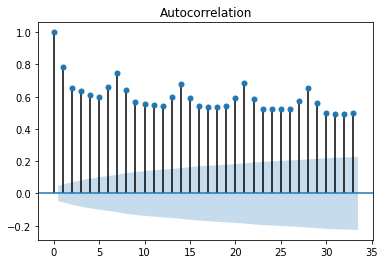

In [110]:

from pandas import read_csv
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
series = tgebase['kurs']
plot_acf(series)
plt.show()


**PACF** w poziomach (w cenach).

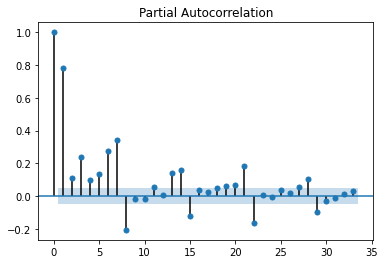

In [111]:
from pandas import read_csv
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_pacf
series = tgebase['kurs']
plot_pacf(series)
pyplot.show()

**ACF** po zróżnicowaniu (w przyrostach cen).

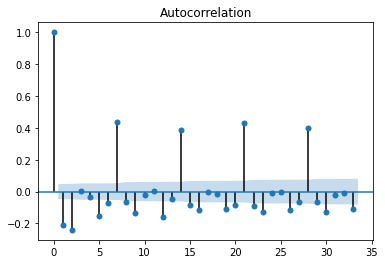

In [112]:
series = tgebase['kurs_diff']
plot_acf(series)
pyplot.show()

**PACF** po zróżnicowaniu (w przyrostach cen).



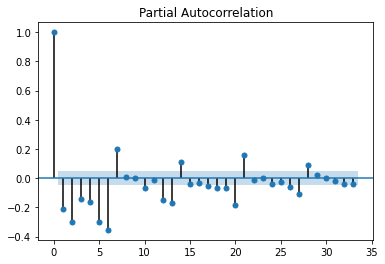

In [113]:
series = tgebase['kurs_diff']
plot_pacf(series)
pyplot.show()

In [114]:
df_makro_raw = pd.read_csv('dane_makro.csv', sep =';')
makro = df_makro_raw.copy()
makro.info()

In [117]:
makro['period'] = makro['rok'].astype(str) + makro['miesiac'].astype(str)

In [118]:
import datetime
tgebase.data_dostawy = pd.to_datetime(tgebase.data_dostawy)
tgebase['rok'] = tgebase.data_dostawy.dt.year
tgebase['miesiac'] = tgebase.data_dostawy.dt.month

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5168: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [121]:
tgebase['period'] = tgebase['rok'].astype(str) + tgebase['miesiac'].astype(str)
t_base = tgebase[tgebase['period'] != '202010']
df = pd.merge(t_base, makro, on='period', how='left')
df = df.drop(columns = ['rok_x', 'miesiac_x',  'rok_y', 'miesiac_y'])
df_copy = df.copy()
df_copy = df_copy.drop(columns = ['data_dostawy', 'indeks', 'period',
                                  'kurs_lag', 'kurs_diff'])
for column in df_copy.columns:
  if df_copy[column].dtype == 'object':
    df_copy[column] = df_copy[column].astype('int')

korelacje_cen_wskaznik_makro = df_copy.corr().kurs.sort_values()[:-1]
kor_gt_02 = korelacje_cen_wskaznik_makro[abs(korelacje_cen_wskaznik_makro) >= 0.2]
print(f'Wartość bezwzględna korelacji cena_TGebase vs dane makro >- 0.1: {korelacje_cen_wskaznik_makro[abs(korelacje_cen_wskaznik_makro) >= 0.1]}')
print(f'Wartość bezwzględna korelacji cena_TGebase vs dane makro >- 0.2: {korelacje_cen_wskaznik_makro[abs(korelacje_cen_wskaznik_makro) >= 0.2]}')
kor_gt_02.to_csv('korelacje_energia_makro.csv')


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

